In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\hp\Downloads\pollution_us_2000_2016 .csv')

In [3]:
df.head()

,Unnamed: 0,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,1.145833,4.2,21,NaN
1,1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,0.878947,2.2,23,25.0
2,2,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,1.145833,4.2,21,NaN
3,3,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,0.878947,2.2,23,25.0
4,4,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,...,Parts per billion,1.958333,3.0,22,4.0,Parts per million,0.850000,1.6,23,NaN


In [4]:
df.shape

(1746661, 29)

29 columns and 1.7 million of records

In [5]:
df =df.drop(['Unnamed: 0'],axis=1)

In [6]:
df.isna().sum()

State Code                0
County Code               0
Site Num                  0
Address                   0
State                     0
County                    0
City                      0
Date Local                0
NO2 Units                 0
NO2 Mean                  0
NO2 1st Max Value         0
NO2 1st Max Hour          0
NO2 AQI                   0
O3 Units                  0
O3 Mean                   0
O3 1st Max Value          0
O3 1st Max Hour           0
O3 AQI                    0
SO2 Units                 0
SO2 Mean                  0
SO2 1st Max Value         0
SO2 1st Max Hour          0
SO2 AQI              872907
CO Units                  0
CO Mean                   0
CO 1st Max Value          0
CO 1st Max Hour           0
CO AQI               873323
dtype: int64

Two columns have missing values

In [7]:
df.describe(include = 'object')

,Address,State,County,City,Date Local,NO2 Units,O3 Units,SO2 Units,CO Units
count,1746661,1746661,1746661,1746661,1746661,1746661,1746661,1746661,1746661
unique,204,47,133,144,5996,1,1,1,1
top,PIKE AVE AT RIVER ROAD,California,Los Angeles,Not in a city,2002-06-10,Parts per billion,Parts per million,Parts per billion,Parts per million
freq,35332,576142,93381,138411,640,1746661,1746661,1746661,1746661


There are 47 States, 133 countries and 144 cities in the dataset. The NO2 and SO2 units are expressed in parts per billion and O3 and CO units in parts per million.

# To obtain data types of the columns

In [8]:
df.dtypes

State Code             int64
County Code            int64
Site Num               int64
Address               object
State                 object
County                object
City                  object
Date Local            object
NO2 Units             object
NO2 Mean             float64
NO2 1st Max Value    float64
NO2 1st Max Hour       int64
NO2 AQI                int64
O3 Units              object
O3 Mean              float64
O3 1st Max Value     float64
O3 1st Max Hour        int64
O3 AQI                 int64
SO2 Units             object
SO2 Mean             float64
SO2 1st Max Value    float64
SO2 1st Max Hour       int64
SO2 AQI              float64
CO Units              object
CO Mean              float64
CO 1st Max Value     float64
CO 1st Max Hour        int64
CO AQI               float64
dtype: object

In [12]:
df['date'] = pd.to_datetime(df['Date Local'],format='%Y-%m')
df['year']=pd.DatetimeIndex(df['Date Local']).year
df['Month']=pd.DatetimeIndex(df['Date Local']).month

In [13]:
df.columns

Index(['State Code', 'County Code', 'Site Num', 'Address', 'State', 'County',
       'City', 'Date Local', 'NO2 Units', 'NO2 Mean', 'NO2 1st Max Value',
       'NO2 1st Max Hour', 'NO2 AQI', 'O3 Units', 'O3 Mean',
       'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI', 'SO2 Units',
       'SO2 Mean', 'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI',
       'CO Units', 'CO Mean', 'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI',
       'date', 'year', 'Month'],
      dtype='object')

# Check count of records year-wise

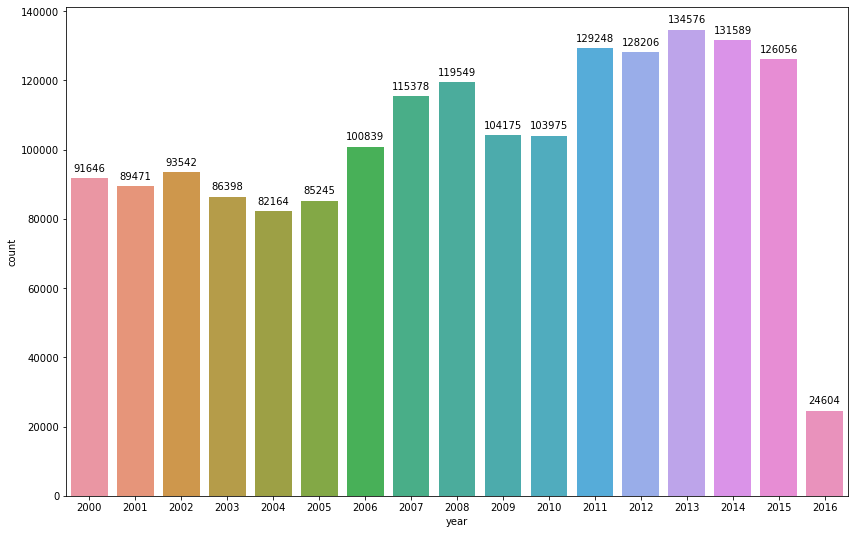

In [14]:
plt.figure(figsize=(14,9))
splot = sns.countplot(data=df,x='year')
for p in splot.patches:
        splot.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', rotation=0, xytext=(0, 10), textcoords='offset points') 

Text(0, 0.5, 'Count')

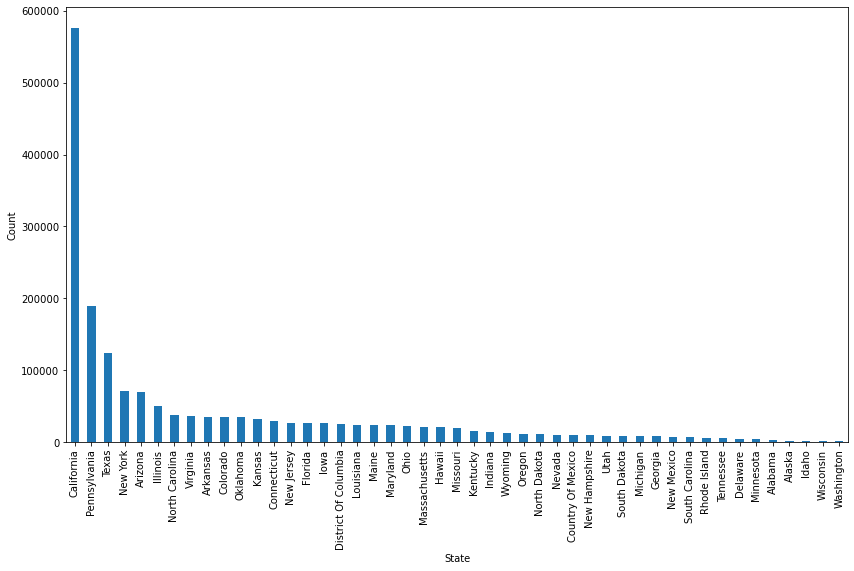

In [29]:
ax = df['State'].value_counts().plot(kind='bar',figsize=(14,8))
ax.set_xlabel('State')
ax.set_ylabel('Count')

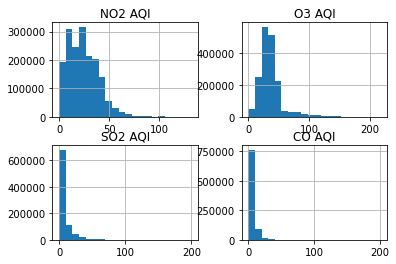

In [16]:
Pol_aqi = df[["NO2 AQI","O3 AQI","SO2 AQI", "CO AQI"]]
Pol_aqi.index = df["Date Local"]

# Exclude Outliers
Pol_aqi.hist(bins=20)
plt.show()

CO and SO2 seem to have more extreme outliers. A common feature of pollution measurement whose consequence on human health is hardly known.

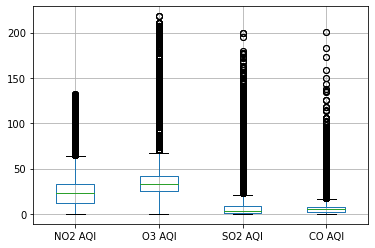

In [17]:
box_aqi=df[["NO2 AQI","O3 AQI","SO2 AQI", "CO AQI"]]
box_aqi.index = df["Date Local"]
box_aqi.boxplot()
plt.show()

# Changes in the level of pollution over time

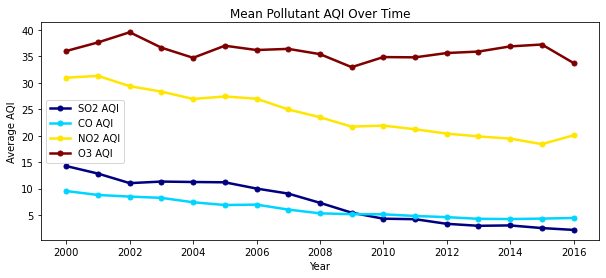

In [23]:
f, ax = plt.subplots(figsize=[10,4])
df.groupby(['year']).agg({'SO2 AQI': 'mean',
                          'CO AQI': 'mean',
                          'NO2 AQI': 'mean',
                          'O3 AQI': 'mean'}).plot(colormap='jet',marker='.',markersize=10, ax =ax,linewidth=2.5)
ax.set_title('Mean Pollutant AQI Over Time')
ax.set(ylabel="Average AQI", xlabel="Year")
plt.show()

For all pollutants except ozone, AQI has decreased from 2000 to 2016. For ozone the level of AQI for 2016 is practically the same as in 2000.

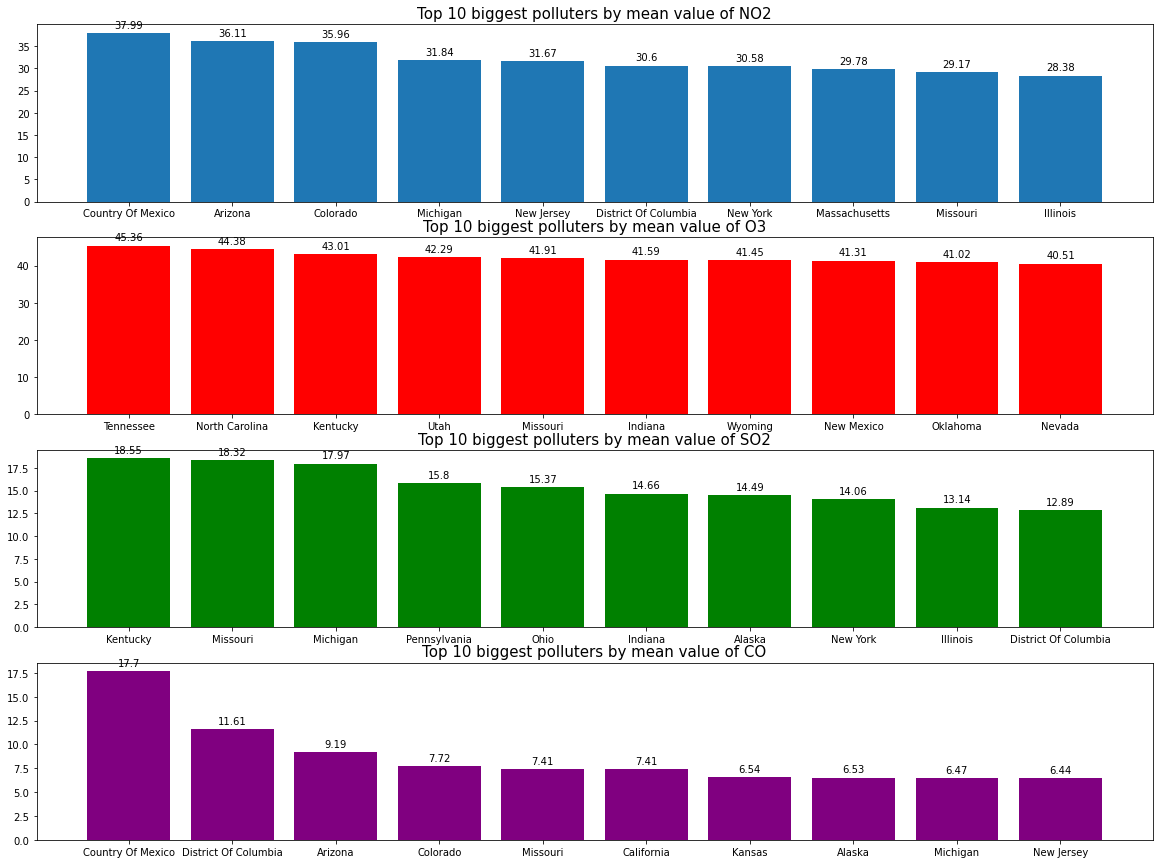

<Figure size 1440x1080 with 0 Axes>

In [19]:
df_AQI = df[['State', 'Date Local', 'NO2 AQI', 'O3 AQI', 'SO2 AQI', 'CO AQI']]
df_AQI_State = df_AQI.groupby('State').mean()
df_AQI_State.reset_index(inplace=True)


plt.rcParams["figure.figsize"] = (20, 15) 


x = np.arange(10)


fig, axs = plt.subplots(4, 1)

# Plot for NO2
df_AQI_State.sort_values(by = 'NO2 AQI', ascending = False, inplace = True)
barplot1 = axs[0].bar(x, 'NO2 AQI', data=df_AQI_State[:10], label = 'NO2')
xlabels = df_AQI_State.iloc[:10]['State']
plt.sca(axs[0])
plt.title('Top 10 biggest polluters by mean value of NO2',fontsize=15)
plt.xticks(x, xlabels) # x axis marks

# Plot for O3
df_AQI_State.sort_values(by = 'O3 AQI', ascending = False, inplace = True)
barplot2 = axs[1].bar(x, 'O3 AQI', data=df_AQI_State[:10], label = 'O3', color = 'red')
xlabels = df_AQI_State.iloc[:10]['State']
plt.sca(axs[1])
plt.title('Top 10 biggest polluters by mean value of O3',fontsize=15)
plt.xticks(x, xlabels) # x axis marks
# Plot for SO2
df_AQI_State.sort_values(by = 'SO2 AQI', ascending = False, inplace = True)
barplot3 = axs[2].bar(x, 'SO2 AQI', data=df_AQI_State[:10], label = 'SO2', color = 'green')
xlabels = df_AQI_State.iloc[:10]['State']
plt.sca(axs[2])
plt.title('Top 10 biggest polluters by mean value of SO2',fontsize=15)
plt.xticks(x, xlabels) # x axis marks

# Plot for CO
df_AQI_State.sort_values(by = 'CO AQI', ascending = False, inplace = True)
barplot4 = axs[3].bar(x, 'CO AQI', data=df_AQI_State[:10], label = 'CO', color = 'purple')
xlabels = df_AQI_State.iloc[:10]['State']
plt.sca(axs[3])
plt.title('Top 10 biggest polluters by mean value of CO',fontsize=15)
plt.xticks(x, xlabels) 

def autolabel(plot,ax):
    for p in plot:
        height = p.get_height().round(2)
        ax.annotate('{}'.format(height),
                    xy=(p.get_x() + p.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')
        
    

autolabel(barplot1,axs[0])
autolabel(barplot2,axs[1])
autolabel(barplot3,axs[2])
autolabel(barplot4,axs[3])
plt.show()
plt.tight_layout()


The highest average pollution level for the years 2000-2016 is for ozone and it is between 40.51 AQI and 45.36. Next is for NO2 (from 28.38 AQI to 37.99 AQI) and then for SO2 (from 12.89 AQI to 18.55 AQI). The lowest level is for CO and it is between 6.44 AQI to 17.70 AQI.

By the mean value of Ozone the biggest polluters are respectively Tennessee (45.36 AQI), North Carolina (44.38 AQI) and Kentucky (43.01 AQI). Kentucky is also one of the biggest polluters for SO2 (18.55 AQI). For NO2 the record holders are respectively: Country of Mexico (37.99 AQI), Arizona (36.11 AQI) and Colorado (35.96 AQI). Country of Mexico and Arizona are also one of the biggest polluters for CO (17.70 AQI and 9.19 AQI respectively)

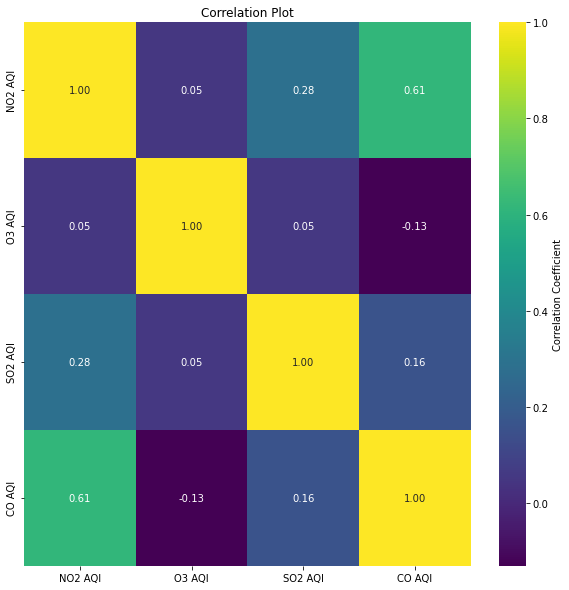

In [20]:
plt.figure(figsize=(10,10))
Pollutants = df[["NO2 AQI","O3 AQI","SO2 AQI", "CO AQI"]]
sns.heatmap(Pollutants.corr(), annot=True, fmt=".2f", cmap="viridis",cbar_kws={'label': 'Correlation Coefficient'})
plt.title("Correlation Plot")
plt.show()

CO AQI and NO2 AQI stand out with the highest positiive correlation out of the bunch.

In [21]:
data = df[['NO2 Mean','SO2 Mean','O3 Mean','CO Mean']].mean()
data_1 = data.to_frame().reset_index()
data_1.columns=['pollutant','level']
data_1

,pollutant,level
0,NO2 Mean,12.821930
1,SO2 Mean,1.870364
2,O3 Mean,0.026125
3,CO Mean,0.368218


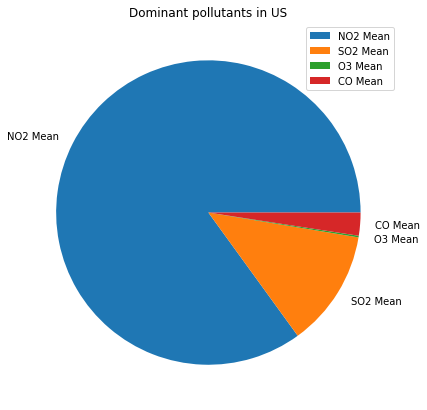

In [22]:
plt.figure(figsize=(7,7))
plt.title('Dominant pollutants in US')
plt.pie(data_1.level,labels=data_1.pollutant)
plt.legend()
plt.show()

This shows that the most dominant pollutant in US is NO2

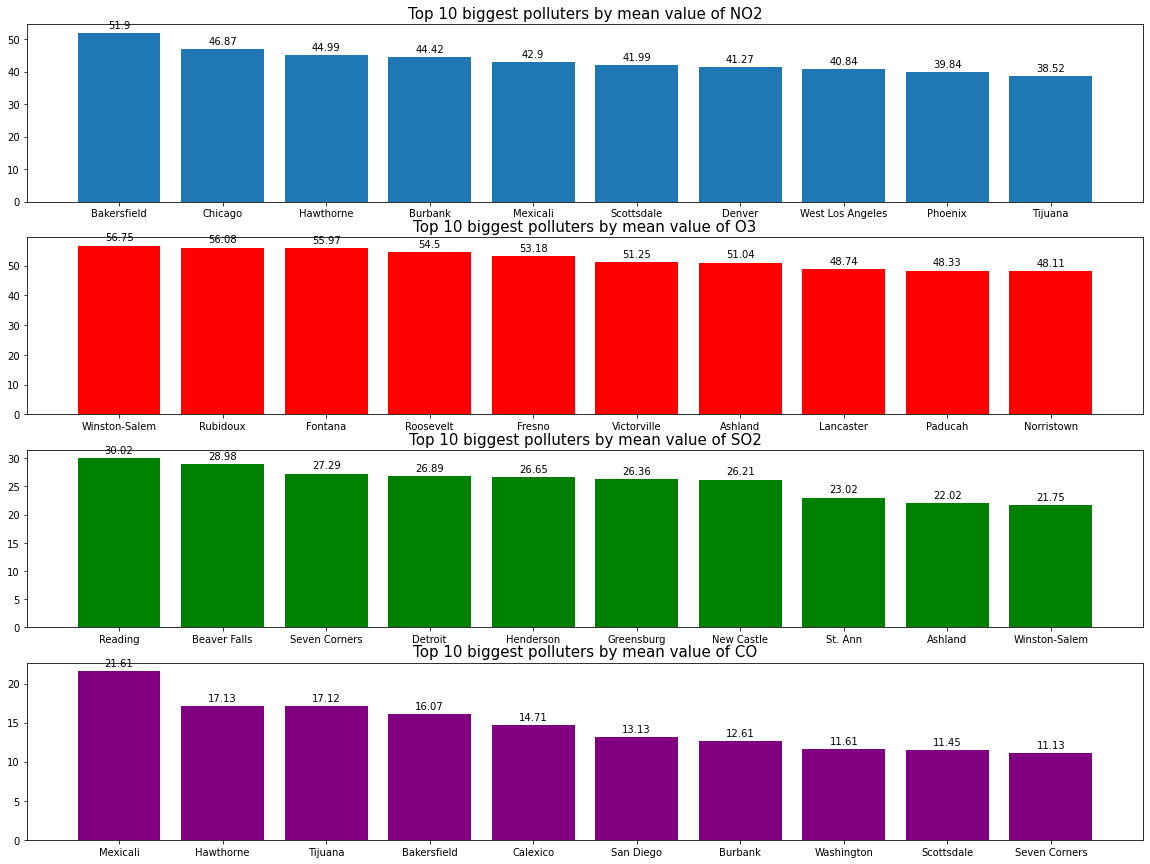

<Figure size 1440x1080 with 0 Axes>

In [30]:
df_AQI = df[['City', 'Date Local', 'NO2 AQI', 'O3 AQI', 'SO2 AQI', 'CO AQI']]
df_AQI_city = df_AQI.groupby('City').mean()
df_AQI_city.reset_index(inplace=True)


plt.rcParams["figure.figsize"] = (20, 15) 


x = np.arange(10)


fig, axs = plt.subplots(4, 1)

# Plot for NO2
df_AQI_city.sort_values(by = 'NO2 AQI', ascending = False, inplace = True)
barplot1 = axs[0].bar(x, 'NO2 AQI', data=df_AQI_city[:10], label = 'NO2')
xlabels = df_AQI_city.iloc[:10]['City']
plt.sca(axs[0])
plt.title('Top 10 biggest polluters by mean value of NO2',fontsize=15)
plt.xticks(x, xlabels) 

# Plot for O3
df_AQI_city.sort_values(by = 'O3 AQI', ascending = False, inplace = True)
barplot2 = axs[1].bar(x, 'O3 AQI', data=df_AQI_city[:10], label = 'O3', color = 'red')
xlabels = df_AQI_city.iloc[:10]['City']
plt.sca(axs[1])
plt.title('Top 10 biggest polluters by mean value of O3',fontsize=15)
plt.xticks(x, xlabels) 
# Plot for SO2
df_AQI_city.sort_values(by = 'SO2 AQI', ascending = False, inplace = True)
barplot3 = axs[2].bar(x, 'SO2 AQI', data=df_AQI_city[:10], label = 'SO2', color = 'green')
xlabels = df_AQI_city.iloc[:10]['City']
plt.sca(axs[2])
plt.title('Top 10 biggest polluters by mean value of SO2',fontsize=15)
plt.xticks(x, xlabels) 

# Plot for CO
df_AQI_city.sort_values(by = 'CO AQI', ascending = False, inplace = True)
barplot4 = axs[3].bar(x, 'CO AQI', data=df_AQI_city[:10], label = 'CO', color = 'purple')
xlabels = df_AQI_city.iloc[:10]['City']
plt.sca(axs[3])
plt.title('Top 10 biggest polluters by mean value of CO',fontsize=15)
plt.xticks(x, xlabels) 

def autolabel(plot,ax):
    for p in plot:
        height = p.get_height().round(2)
        ax.annotate('{}'.format(height),
                    xy=(p.get_x() + p.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        
    

autolabel(barplot1,axs[0])
autolabel(barplot2,axs[1])
autolabel(barplot3,axs[2])
autolabel(barplot4,axs[3])
plt.show()
plt.tight_layout()
